# Plot embedded data

In [1]:
using NPZ, Printf, NNlib, Statistics, Plots, JLD2, LinearAlgebra, Distributions

In [2]:
# fname = "assos_PT0_1sim_20C_51_1985epoch"
fname = "assos_PT3_1sim_20C_21_60epoch"

data_npy =npzread("data/helix_assos/$fname.npz")

Dict{String, Array} with 15 entries:
  "SIM_HT_uniq"      => [1.0e-9, 1.0e-9, 2.0e-9, 3.0e-9, 0.0, 3.0e-9, 3.0e-9, 3…
  "phate_coords"     => [-0.0163115 -0.00163703; -0.0142529 0.00194095; … ; 0.0…
  "data_embed"       => Float32[3.00402 -2.29203 … 2.83319 0.451602; -1.26573 -…
  "pca_all_coords"   => [-2.6135 -1.76164 -7.53725; 0.406293 -5.04136 -11.8653;…
  "SIM_G"            => [0.0, -1.31, -0.27, -1.31, -1.08, -1.31, -0.91, -1.01, …
  "pca_coords"       => [-2.6135 -1.76164 -7.53725; 0.406293 -5.04136 -11.8653;…
  "SIM_scar"         => Float32[0.00375 0.0025 … 10.0372 11.6361; 0.00375 0.002…
  "occp"             => [0.000561798, 0.000561798, 0.000561798, 0.0011236, 0.00…
  "SIM_HT"           => [1.0e-9, 1.0e-9, 2.0e-9, 3.0e-9, 0.0, 0.0, 3.0e-9, 3.0e…
  "SIM_adj"          => [0.0 1.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 1.0 … 0.…
  "SIM_G_uniq"       => [0.0, -1.31, -0.27, -1.31, -1.08, -0.91, -1.01, -1.37, …
  "SIM_adj_uniq"     => [0.0 1.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 1

## PCA Vis

#### 1. Plot PCA with 2 components X,Y-axes and energy as Z-axis with color

In [3]:
X = data_npy["pca_all_coords"][:,1]; Y = data_npy["pca_all_coords"][:,2]; Z = data_npy["SIM_G"];
size(X), size(Y), size(Z)

((1780,), (1780,), (1780,))

In [4]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.85) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.85) # Red for Sf

xlims!(minimum(X)*1.05,maximum(X)*1.05) 
ylims!(minimum(Y)*1.05,maximum(Y)*1.05)

plot!(xlabel="X", ylabel="Y")

savefig("../plot/helix_assos/$(fname)_PCA.png")

WebIO._IJuliaInit()

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA.gif")
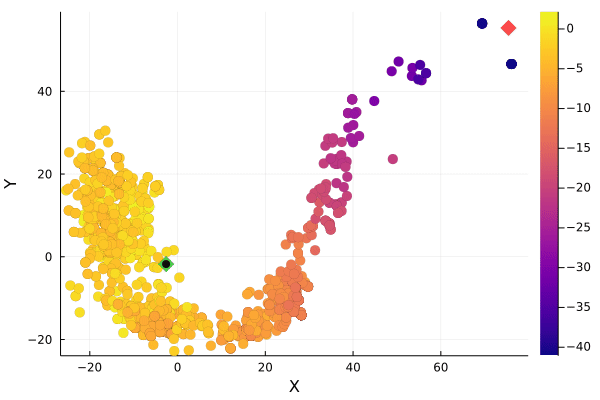

In [5]:
# 2D landscape gif
gr()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

anim = @animate for i in 1:length(X)
    # scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(minimum(X)*1.05,maximum(X)*1.05) 
    ylims!(minimum(Y)*1.05,maximum(Y)*1.05)

    plot!(xlabel="X", ylabel="Y")
    
end every 20

gif(anim, "../plot/helix_assos/$(fname)_PCA.gif", fps=2)

In [6]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf
xlims!(floor(minimum(X)),ceil(maximum(X)))
ylims!(floor(minimum(Y)),ceil(maximum(Y)))
zlims!(floor(minimum(Z)),ceil(maximum(Z)))
plot!(xlabel="X", ylabel="Y", zlabel = "Energy")



┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA_3D.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


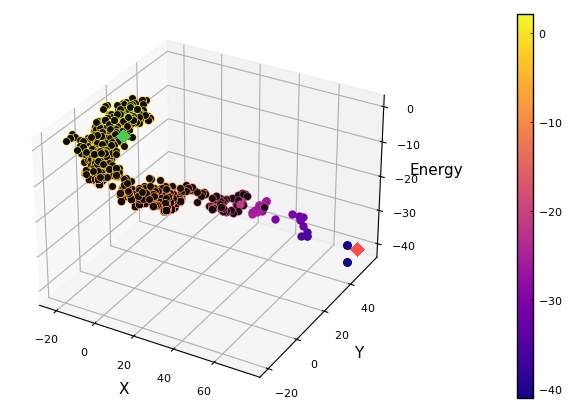

Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA_3D.gif")
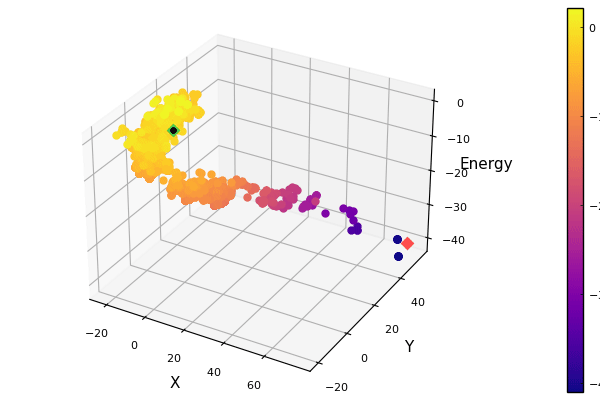

In [7]:
# 3D landscape gif
pyplot()
plot()
scatter!(X,Y,Z,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false);

anim = @animate for i in 1:length(X)

    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=7,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:grays)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(minimum(X)*1.05,maximum(X)*1.05) 
    ylims!(minimum(Y)*1.05,maximum(Y)*1.05)
    zlims!(minimum(Z)*1.05,maximum(Z)*1.05)

    plot!(xlabel="X", ylabel="Y", zlabel = "Energy")
    
end every 60

gif(anim,"../plot/helix_assos/$(fname)_PCA_3D.gif", fps=2)

### Plot PCA with 3 components X,Y,Z-axes, and energy as color 

In [8]:
X=data_npy["pca_all_coords"][:,1]; Y=data_npy["pca_all_coords"][:,2]; Z=data_npy["pca_all_coords"][:,3]; energy=data_npy["SIM_G"];

In [9]:
# 3D
plotlyjs()
plot()

scatter!(X,Y,Z,zcolor=energy,m=cgrad(:plasma),markerstrokewidth=0,markersize=2,legend=false)

plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=0.8) # Green for Si
plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=3,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=0.8) # Red for Sf

xlims!(minimum(X)*1.05,maximum(X)*1.05) 
ylims!(minimum(Y)*1.05,maximum(Y)*1.05)
zlims!(minimum(Z)*1.05,maximum(Z)*1.05)

plot!(xlabel="X", ylabel="Y", zlabel = "Z")


┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA_3D_Z.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


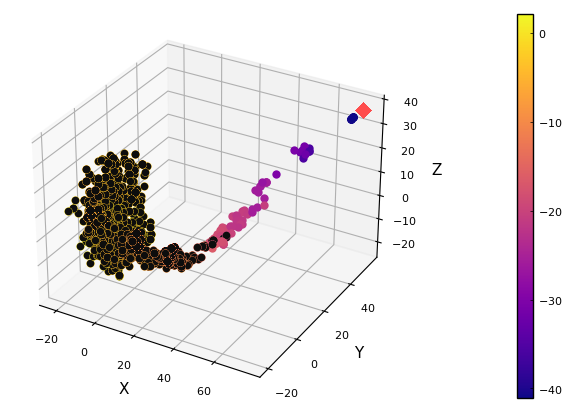

Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PCA_3D_Z.gif")
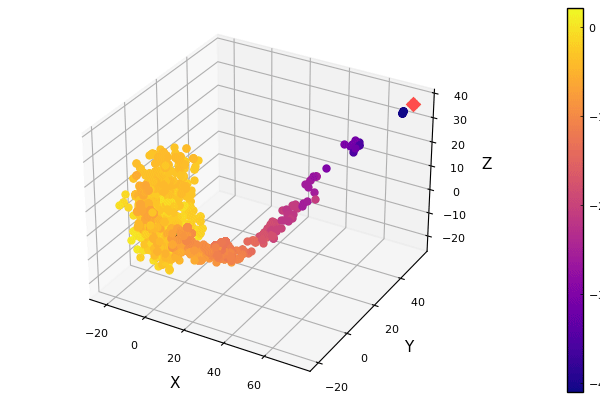

In [10]:
# 3D landscape gif
pyplot()
plot()

scatter!(X,Y,Z,zcolor=energy,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

anim = @animate for i in 1:length(X)

    plot!([X[1]],[Y[1]],[Z[1]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]],[Z[end]], seriestype = :scatter, markersize=8,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],[Z[i]],color=palette(:grays)[1],
            markersize=5.5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(minimum(X)*1.05,maximum(X)*1.05) 
    ylims!(minimum(Y)*1.05,maximum(Y)*1.05)
    zlims!(minimum(Z)*1.05,maximum(Z)*1.05)

    plot!(xlabel="X", ylabel="Y", zlabel = "Z")
    
end every 100

gif(anim,"../plot/helix_assos/$(fname)_PCA_3D_Z.gif", fps=2)

## PHATE Vis

In [11]:
X = data_npy["phate_all_coords"][:,1]; Y = data_npy["phate_all_coords"][:,2]; Z = data_npy["SIM_G"];

In [12]:
# 2D
plotlyjs()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=4,legend=false)

plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[4],markershape=:diamond,opacity=0.85) # Green for Si
plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7,markerstrokewidth=0,
        color=color=palette(:lighttest)[7],markershape=:diamond,opacity=0.85) # Red for Sf
plot!(xlabel="X", ylabel="Y")

savefig("../plot/helix_assos/$(fname)_PHATE.png")

┌ Info: Saved animation to 
│   fn = /Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PHATE.gif
└ @ Plots /Users/chenwei/.julia/packages/Plots/E2187/src/animation.jl:126


Plots.AnimatedGif("/Users/chenwei/Desktop/Github/RPE/plot/helix_assos/assos_PT3_1sim_20C_21_60epoch_PHATE.gif")
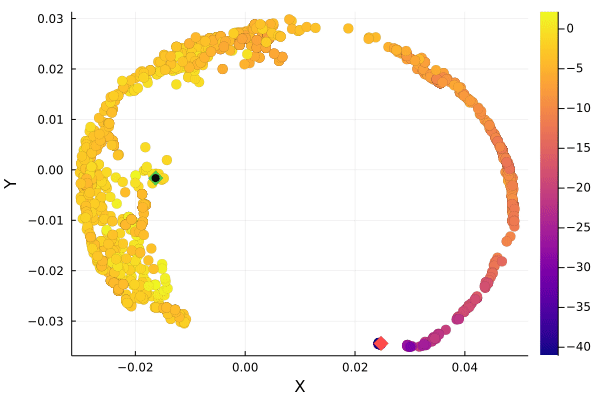

In [13]:
# 2D landscape gif
gr()
plot()

scatter!(X,Y,zcolor=Z,m=cgrad(:plasma),markerstrokewidth=0,markersize=6,legend=false)

anim = @animate for i in 1:length(X)

    plot!([X[1]],[Y[1]], seriestype = :scatter, markersize=7.5,
        color=palette(:lighttest)[4],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Green for Si
    plot!([X[end]],[Y[end]], seriestype = :scatter, markersize=7.5,
        color=palette(:lighttest)[7],markershape=:diamond,opacity=1,
        markerstrokewidth=0) # Red for Sf
    scatter!([X[i]],[Y[i]],color=palette(:grays)[1],
            markersize=5,markerstrokewidth=0,
            legend=false,)#fps=5)

    xlims!(minimum(X)*1.05,maximum(X)*1.05) 
    ylims!(minimum(Y)*1.05,maximum(Y)*1.05)

    plot!(xlabel="X", ylabel="Y")
    
end every 20

gif(anim,"../plot/helix_assos/$(fname)_PHATE.gif", fps=2)